In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import h2o
from h2o.automl import H2OAutoML
from lime.lime_tabular import LimeTabularExplainer

In [4]:
path = Path.cwd()

In [6]:
data_path = path / "churn.csv"
data_path

PosixPath('/Users/tarlanjabiyev/Desktop/Sprint 20/b/churn.csv')

In [8]:
data = pd.read_csv(data_path)
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [12]:
target = 'y'

In [14]:
data[target].value_counts(normalize=True).round(2)

y
no     0.88
yes    0.12
Name: proportion, dtype: float64

In [16]:
data[target] = data[target].map({'yes': '1', 'no': '0'})

In [18]:
df_chr = data.select_dtypes(include=['object']).drop(columns=[target])

In [20]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

df_chr = pd.DataFrame(
    ohe.fit_transform(df_chr),
    columns = ohe.get_feature_names_out(df_chr.columns),
    index = df_chr.index
)

In [22]:
df = pd.concat([data[target],
                data.select_dtypes(include=[np.number]),
                df_chr], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   y                    45211 non-null  object 
 1   id                   45211 non-null  int64  
 2   age                  45211 non-null  int64  
 3   balance              45211 non-null  int64  
 4   day                  45211 non-null  int64  
 5   duration             45211 non-null  int64  
 6   campaign             45211 non-null  int64  
 7   pdays                45211 non-null  int64  
 8   previous             45211 non-null  int64  
 9   job_admin.           45211 non-null  float64
 10  job_blue-collar      45211 non-null  float64
 11  job_entrepreneur     45211 non-null  float64
 12  job_housemaid        45211 non-null  float64
 13  job_management       45211 non-null  float64
 14  job_retired          45211 non-null  float64
 15  job_self-employed    45211 non-null 

In [24]:
df.isna().sum()

y                      0
id                     0
age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0


## H20

In [27]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_301"; Java(TM) SE Runtime Environment (build 1.8.0_301-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.301-b09, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/w5/0qbzsvvx23g_63j6m77_09nm0000gn/T/tmplagvgnc5
  JVM stdout: /var/folders/w5/0qbzsvvx23g_63j6m77_09nm0000gn/T/tmplagvgnc5/h2o_tarlanjabiyev_started_from_python.out
  JVM stderr: /var/folders/w5/0qbzsvvx23g_63j6m77_09nm0000gn/T/tmplagvgnc5/h2o_tarlanjabiyev_started_from_python.err
  Server is running at http://127.0.0.1:54321
 successful.o H2O server at http://127.0.0.1:54321 ...
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Baku
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 months and 21 days
H2O_cluster_name:,H2O_from_python_tarlanjabiyev_c39qyh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.769 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [28]:
h2o_data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
h2o_data[target] = h2o_data[target].asfactor()

In [30]:
features = df.drop(columns=[target,'id']).columns.to_list()
features

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

## Datanın bölünməsi

In [31]:
train, valid, test = h2o_data.split_frame(ratios=[0.8, 0.1], seed=123)

## AutoML

In [33]:
model = H2OAutoML(
    stopping_metric = "auc",
    nfolds = 10, seed = 123,
    balance_classes = True,
    exclude_algos = ['GLM'],
    max_runtime_secs = 300
)

model.train(
    x = features, y = target,
    training_frame = train,
    validation_frame = valid,
    leaderboard_frame = test
)

AutoML progress: |
19:49:01.298: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250917_194901


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    4                  4                           15982                  15           15           15            299           330           311.75

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.35398513034089124
RMSE: 0.5949664951414417
LogLoss: 0.9581805128799226
Mean Per-Class Error: 0.11765111724481277
AUC: 0.94801560386
AUCPR: 0.9364158262266344
Gini: 0.8960312077199999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11324867375078938
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      26509  5454   0.1706   (5454.0/31963.0)
1      2068   29911  0.0647   (2068.0/31979.0)
Total  28577  35365  0.1176   (7522.0/63942.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.113249     0.888305  244
max f2                       0.0939628    0.933994  290
max f0point5                 0.134948     0.883474  198
max accuracy                 0.113249     0.882362  244
max precision                0.212566     1         0
max recall                   0.0691863    1         366
max specificity              0.212566     1         0
max absolute_mcc             0.113249     0.769043  244
max min_per_class_accuracy   0.127341     0.878641  214
max mean_per_class_accuracy  0.113249     0.882349  244
max tns                      0.212566     31963     0
max fns                      0.212566     31972     0
max fps                      0.0609816    31963     399
max tps                      0.0691863    31979     366
max tnr                      0.212566     1         0
max fnr                      0.212566     0.999781  0
max fpr                      0.0609816    1         399
max tpr                      0.0691863    1         366

Gains/Lift Table: Avg response rate: 50.01 %, avg score: 12.60 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100247                   0.206692           1.99638     1.99638            0.99844          0.208352   0.99844                     0.208352            0.0200131       0.0200131                  99.638    99.638             0.0199818
2        0.0200807                   0.204585           1.99328     1.99483            0.99689          0.205588   0.997664                    0.206968            0.0200444       0.0400575                  99.328    99.4828            0.0399637
3        0.0301054                   0.202581           1.97454     1.98807            0.98752          0.203592   0.994286                    0.205844            0.0197942       0.0598518                  97.4545   98.8074            0.0595076
4        0.0400676                   0.200788           1.96183     1.98155            0.981162         0.201687   0.991023                    0.20481             0.0195441       0.0793959                  96.1832   98.1549            0.0786763
5        0.050061                    0.199164           1.96195     1.97764            0.981221         0.199986   0.989

In [39]:
model.leaderboard.as_data_frame()

/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,GBM_1_AutoML_1_20250917_194901,0.925578,0.290725,0.579676,0.182935,0.294511,0.086737
1,StackedEnsemble_BestOfFamily_1_AutoML_1_202509...,0.923178,0.208307,0.553222,0.179496,0.256437,0.065760
2,XGBoost_1_AutoML_1_20250917_194901,0.923144,0.344814,0.553128,0.179496,0.321029,0.103059


In [41]:
leader_model = model.leader
leader_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250917_194901


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    4                  4                           15982                  15           15           15            299           330           311.75

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.35398513034089124
RMSE: 0.5949664951414417
LogLoss: 0.9581805128799226
Mean Per-Class Error: 0.11765111724481277
AUC: 0.94801560386
AUCPR: 0.9364158262266344
Gini: 0.8960312077199999

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11324867375078938
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      26509  5454   0.1706   (5454.0/31963.0)
1      2068   29911  0.0647   (2068.0/31979.0)
Total  28577  35365  0.1176   (7522.0/63942.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.113249     0.888305  244
max f2                       0.0939628    0.933994  290
max f0point5                 0.134948     0.883474  198
max accuracy                 0.113249     0.882362  244
max precision                0.212566     1         0
max recall                   0.0691863    1         366
max specificity              0.212566     1         0
max absolute_mcc             0.113249     0.769043  244
max min_per_class_accuracy   0.127341     0.878641  214
max mean_per_class_accuracy  0.113249     0.882349  244
max tns                      0.212566     31963     0
max fns                      0.212566     31972     0
max fps                      0.0609816    31963     399
max tps                      0.0691863    31979     366
max tnr                      0.212566     1         0
max fnr                      0.212566     0.999781  0
max fpr                      0.0609816    1         399
max tpr                      0.0691863    1         366

Gains/Lift Table: Avg response rate: 50.01 %, avg score: 12.60 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100247                   0.206692           1.99638     1.99638            0.99844          0.208352   0.99844                     0.208352            0.0200131       0.0200131                  99.638    99.638             0.0199818
2        0.0200807                   0.204585           1.99328     1.99483            0.99689          0.205588   0.997664                    0.206968            0.0200444       0.0400575                  99.328    99.4828            0.0399637
3        0.0301054                   0.202581           1.97454     1.98807            0.98752          0.203592   0.994286                    0.205844            0.0197942       0.0598518                  97.4545   98.8074            0.0595076
4        0.0400676                   0.200788           1.96183     1.98155            0.981162         0.201687   0.991023                    0.20481             0.0195441       0.0793959                  96.1832   98.1549            0.0786763
5        0.050061                    0.199164           1.96195     1.97764            0.981221         0.199986   0.989

## Proqnozlar

In [43]:
pred = leader_model.predict(test).as_data_frame()
pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict,p0,p1
0,0,0.937265,0.062735
1,0,0.928300,0.071700
2,0,0.936283,0.063717
3,1,0.847821,0.152179
4,0,0.937812,0.062188
...,...,...,...
4578,0,0.896099,0.103901
4579,1,0.802456,0.197544
4580,1,0.846086,0.153914
4581,1,0.812179,0.187821


## "Overfitting" / "Underfitting" 

In [451]:
leader_model.model_performance(train=True).auc()

0.9538955972183185

In [453]:
leader_model.model_performance(valid=True).auc()

0.9268112797182565

In [455]:
leader_model.model_performance(xval=True).auc()

0.9195868893964463

In [457]:
leader_model.model_performance(test).auc()

0.9305119532267975

## Önəmli Dəyişən - Variable Importance

In [467]:
vi_df = leader_model.varimp(use_pandas=True)
vi_df = vi_df[vi_df['percentage'] > 0.01][['variable', 'percentage']]
vi_df

,variable,percentage
0,duration,0.460607
1,poutcome_success,0.113208
2,contact_unknown,0.052664
3,day,0.051221
4,pdays,0.037978
5,age,0.034633
6,housing_yes,0.027650
7,housing_no,0.026018
8,month_mar,0.021816
9,month_jul,0.016895


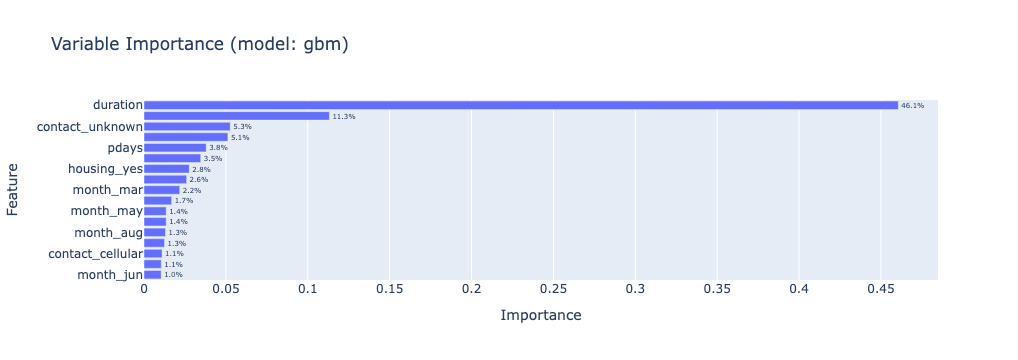

In [469]:
vi_df = vi_df.sort_values('percentage', ascending=True)

fig = px.bar(
    vi_df,
    x="percentage",
    y="variable",
    orientation="h",
    title=f"Variable Importance (model: {leader_model.algo})",
    labels={"percentage": "Importance", "variable": "Feature"}
)
fig.update_traces(
    hovertemplate = "<b>%{y}</b><br>Importance: %{x:.2%}<extra></extra>",
    text = vi_df['percentage'].map(lambda v: f"{v:.1%}"),
    textposition = 'outside'
)
fig.show()

## Qara qutunun izahı - Explanation of "Black Box"

In [62]:
train_df = train.as_data_frame().drop(columns=['id'])
test_df = test.as_data_frame().drop(columns=['id'])

/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/opt/anaconda3/lib/python3.12/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [64]:
def h2o_predict_proba(data):
    h2o_data = h2o.H2OFrame(data)
    preds = model.predict(h2o_data).as_data_frame()
    return preds.iloc[:, 1:].to_numpy()

In [66]:
explainer = LimeTabularExplainer(
    training_data=np.array(train_df[features]),
    feature_names=features,
    class_names=list(train_df[target].unique()),
    mode='classification'
)

In [68]:
i = 0  
exp = explainer.explain_instance(
    data_row = test_df[features].iloc[i],
    predict_fn = h2o_predict_proba
)

/opt/anaconda3/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/opt/anaconda3/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positio

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
 (failed)ction progress: |


OSError: Job with key $03017f00000132d4ffffffff$_8ad57acbc7da25115de66728e3ca49be failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has no columns in common with the training set
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has no columns in common with the training set
	at hex.Model.adaptTestForTrain(Model.java:1841)
	at hex.Model.adaptTestForTrain(Model.java:1643)
	at hex.Model.adaptTestForTrain(Model.java:1639)
	at hex.Model.adaptFrameForScore(Model.java:1981)
	at hex.Model.score(Model.java:1999)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:555)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [53]:
exp.show_in_notebook(show_table=True)

NameError: name 'exp' is not defined

## Modeli saxla və yüklə

In [498]:
model_path = h2o.save_model(model=leader_model, path=str(path))

In [500]:
model_path

'/Users/tarlanjabiyev/Desktop/Sprint 20/b/GBM_1_AutoML_9_20250908_175008'

In [502]:
saved_model = h2o.load_model(model_path)

In [504]:
saved_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_9_20250908_175008


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          40617                  15           15           15            247           362           317

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.2955857684672773
RMSE: 0.5436780007203503
LogLoss: 0.7796453445946702
Mean Per-Class Error: 0.1113835613719523
AUC: 0.9538955972183185
AUCPR: 0.9441467216038968
Gini: 0.907791194436637

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10173717000747888
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      26230  5733   0.1794   (5733.0/31963.0)
1      1388   30591  0.0434   (1388.0/31979.0)
Total  27618  36324  0.1114   (7121.0/63942.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.101737     0.895744  289
max f2                       0.0790905    0.939511  314
max f0point5                 0.176955     0.887507  212
max accuracy                 0.12094      0.890416  269
max precision                0.374089     1         0
max recall                   0.0377026    1         375
max specificity              0.374089     1         0
max absolute_mcc             0.101737     0.784539  289
max min_per_class_accuracy   0.141268     0.882954  247
max mean_per_class_accuracy  0.12094      0.890408  269
max tns                      0.374089     31963     0
max fns                      0.374089     31964     0
max fps                      0.0279474    31963     399
max tps                      0.0377026    31979     375
max tnr                      0.374089     1         0
max fnr                      0.374089     0.999531  0
max fpr                      0.0279474    1         399
max tpr                      0.0377026    1         375

Gains/Lift Table: Avg response rate: 50.01 %, avg score: 15.40 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101029                   0.353801           1.9995     1.9995             1                0.359936   1                           0.359936            0.0202008       0.0202008                  99.95     99.95              0.0202008
2        0.0200494                   0.347703           1.9995     1.9995             1                0.35089    1                           0.355448            0.0198881       0.0400888                  99.95     99.95              0.0400888
3        0.0301054                   0.34227            1.98706    1.99534            0.993779         0.344717   0.997922                    0.351864            0.0199819       0.0600707                  98.7061   99.5345            0.0599455
4        0.0400832                   0.337829           1.9901     1.99404            0.995298         0.34006    0.997269                    0.348925            0.0198568       0.0799275                  99.0098   99.4039            0.0797084
5        0.0500141                   0.332784           1.96171    1.98762            0.981102         0.335277   0.994059     

In [506]:
saved_model.model_performance(test).auc()

0.9305119532267975